In [45]:
import numpy as np
import pandas as pd
from pathlib import Path  
import seaborn as sns

In [46]:
#df2 = pd.ExcelFile('../../data/raw/Jones-Kammen-2014-Zip-City-County-Results.xlsx')
cfc_df = pd.read_excel('../../data/raw/Jones-Kammen-2014-Zip-City-County-Results.xlsx', sheet_name= 'County results')
cfc_df.head()

,Population,State,County,electricity (kWh),Nat. Gas (cu.ft.),FUELOIL (gallons),Vehicle miles traveled,Transport (tCO2e/yr),Housing (tCO2e/yr),Food (tCO2e/yr),Goods (tCO2e/yr),Services (tCO2e/yr),Total Household Carbon Footprint (tCO2e/yr),Households,Total County Carbon Footprint (tCO2e/yr)
0,10,AK,JUNEAU,4128.496254,26033.750948,72.354330,8074.000000,5.925587,6.065464,3.750000,3.054273,3.466416,22.261739,85.0,1892.247853
1,4336,AK,YUKON KOYUKUK,5581.508536,26607.262942,345.595186,10363.603552,7.543985,5.364597,8.801451,4.704034,4.957767,31.371833,1132.0,35512.914997
2,15981,AK,BETHEL,5938.450363,26562.320038,556.653438,11799.094049,8.452924,3.028379,11.553512,5.435957,5.560463,34.031235,1239.0,42164.700168
3,1745,AK,LAKE AND PENINSULA,6091.910223,25538.669840,579.568249,11820.514040,8.646400,8.184707,9.401811,5.201408,5.533073,36.967400,819.0,30276.300664
4,5098,AK,ALEUTIANS WEST,5361.596806,23406.596842,502.171462,17587.886230,13.408990,2.364099,7.677670,6.683501,7.774904,37.909165,352.0,13344.025940


In [47]:
#create new columns for data
cfc_df.insert(loc = 0, column = 'Transport Total (tCO2e/yr)', value = cfc_df['Transport (tCO2e/yr)']*cfc_df['Households'])
cfc_df.insert(loc = 0, column = 'Housing Total (tCO2e/yr)', value = cfc_df['Housing (tCO2e/yr)']*cfc_df['Households'])
cfc_df.insert(loc = 0, column = 'Food Total (tCO2e/yr)', value = cfc_df['Food (tCO2e/yr)']*cfc_df['Households'])
cfc_df.insert(loc = 0, column = 'Goods Total (tCO2e/yr)', value = cfc_df['Goods (tCO2e/yr)']*cfc_df['Households'])
cfc_df.insert(loc = 0, column = 'Services Total (tCO2e/yr)', value = cfc_df['Services (tCO2e/yr)']*cfc_df['Households'])

In [48]:
## change misnomer 'Total Household Carbon Footprint (tCO2e/yr)' to 'Total Per-Household Carbon Footprint (tCO2e/yr)'
cfc_df.rename(columns = {'Total Household Carbon Footprint (tCO2e/yr)' : 'Total Per-Household Carbon Footprint (tCO2e/yr)'}, inplace = True)

In [49]:
cfc_df_totals = cfc_df[['Population', 'State', 'County', 'electricity (kWh)', 'Nat. Gas (cu.ft.)', 'FUELOIL (gallons)', 'Vehicle miles traveled', 
                 'Transport Total (tCO2e/yr)','Housing Total (tCO2e/yr)', 'Food Total (tCO2e/yr)','Goods Total (tCO2e/yr)', 
                 'Services Total (tCO2e/yr)', # 'New Total Carbon Footprints per MSA', 
                 'Total Per-Household Carbon Footprint (tCO2e/yr)', 'Households', 'Total County Carbon Footprint (tCO2e/yr)']]

In [50]:
cfc_df_totals.head()

,Population,State,County,electricity (kWh),Nat. Gas (cu.ft.),FUELOIL (gallons),Vehicle miles traveled,Transport Total (tCO2e/yr),Housing Total (tCO2e/yr),Food Total (tCO2e/yr),Goods Total (tCO2e/yr),Services Total (tCO2e/yr),Total Per-Household Carbon Footprint (tCO2e/yr),Households,Total County Carbon Footprint (tCO2e/yr)
0,10,AK,JUNEAU,4128.496254,26033.750948,72.354330,8074.000000,503.674865,515.564451,318.750000,259.613201,294.645335,22.261739,85.0,1892.247853
1,4336,AK,YUKON KOYUKUK,5581.508536,26607.262942,345.595186,10363.603552,8539.790566,6072.723929,9963.242131,5324.966486,5612.191884,31.371833,1132.0,35512.914997
2,15981,AK,BETHEL,5938.450363,26562.320038,556.653438,11799.094049,10473.173168,3752.161045,14314.801735,6735.150436,6889.413784,34.031235,1239.0,42164.700168
3,1745,AK,LAKE AND PENINSULA,6091.910223,25538.669840,579.568249,11820.514040,7081.401965,6703.275336,7700.083117,4259.953401,4531.586844,36.967400,819.0,30276.300664
4,5098,AK,ALEUTIANS WEST,5361.596806,23406.596842,502.171462,17587.886230,4719.964562,832.162797,2702.539725,2352.592510,2736.766345,37.909165,352.0,13344.025940


In [51]:
## msa--municipality (county) mapping
df = pd.read_csv('../../data/tidy/msa-municipality.csv', delimiter=',', skiprows=0, low_memory=False)
df.head()

,msa,municipality
0,"Abilene, TX","['Callahan County, TX', 'Jones County, TX', 'T..."
1,"Akron, OH","['Portage County, OH', 'Summit County, OH']"
2,"Albany, GA","['Dougherty County, GA', 'Lee County, GA', 'Te..."
3,"Albany-Lebanon, OR","['Linn County, OR']"
4,"Albany-Schenectady-Troy, NY","['Albany County, NY', 'Rensselaer County, NY',..."


In [52]:
# use the explode function to split the municipality column into separate rows
df["municipality"] = df["municipality"].apply(eval)
msa_muni_exploded = df.explode('municipality')
msa_muni_exploded = msa_muni_exploded.reset_index(drop=True) # reset the index of the dataframe
msa_muni_exploded.head()

,msa,municipality
0,"Abilene, TX","Callahan County, TX"
1,"Abilene, TX","Jones County, TX"
2,"Abilene, TX","Taylor County, TX"
3,"Akron, OH","Portage County, OH"
4,"Akron, OH","Summit County, OH"


In [53]:
## Get column of states only
msa_muni_exploded['state'] = msa_muni_exploded['municipality'].str.replace('County', '')
msa_muni_exploded['state'] = msa_muni_exploded['state'].str.split(',', expand=True).iloc[:,1]
msa_muni_exploded['state'] = msa_muni_exploded['state'].str.strip()

In [54]:
msa_muni_exploded['state'].unique()

array(['TX', 'OH', 'GA', 'OR', 'NY', 'NM', 'LA', 'NJ', 'PA', 'IA', 'AK',
       'MI', 'AL', 'WI', 'NC', 'SC', 'CA', 'MD', 'ME', 'MA', 'WV', 'WA',
       'MT', 'ND', 'VA', 'IL', 'IN', 'ID', 'NH', 'CO', 'KY', 'CT', 'VT',
       'FL', 'MO', 'NV', 'WY', 'TN', 'DE', 'MN', 'OK', 'AR', 'AZ', 'NE',
       'MS', 'HI', 'KS', 'UT', 'RI', 'SD', '', 'DC'], dtype=object)

In [55]:
## Get county column and format county names to look like those in cfc_df
msa_muni_exploded['municipality'] = msa_muni_exploded['municipality'].str.replace('County', '')
msa_muni_exploded['municipality'] = msa_muni_exploded['municipality'].str.split(',', expand=True).iloc[:,0]
msa_muni_exploded['municipality'] = msa_muni_exploded['municipality'].str.upper()

In [56]:
## CHECK: Compare both lists to see if they are the same (use setdiff, etc)
# msa_muni_exploded['municipality'].unique()
# cfc_df['County'].unique()

In [57]:
len(msa_muni_exploded)

1181

In [58]:
cfc_df_totals.loc[:,'msa'] = np.nan

C:\Users\mazee\AppData\Local\Temp\ipykernel_28344\534564195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cfc_df_totals.loc[:,'msa'] = np.nan


In [59]:
for i in cfc_df_totals.index:
    #print(i)
    msa_assign = msa_muni_exploded.loc[(msa_muni_exploded['municipality'] == cfc_df_totals.loc[i,'County'])  &
                                       (msa_muni_exploded['state'] == cfc_df_totals.loc[i,'State']), 'msa']
    
    if msa_assign.empty == False:
        # print(msa_assign.iloc[0])
        cfc_df_totals.at[i,'MSA'] = msa_assign.iloc[0]

C:\Users\mazee\AppData\Local\Temp\ipykernel_28344\2133041424.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cfc_df_totals.at[i,'MSA'] = msa_assign.iloc[0]


In [60]:
## aggregate by MSA
cfc_msa = cfc_df_totals.groupby(by=["MSA"]).sum()
cfc_msa.head()

,Population,State,County,electricity (kWh),Nat. Gas (cu.ft.),FUELOIL (gallons),Vehicle miles traveled,Transport Total (tCO2e/yr),Housing Total (tCO2e/yr),Food Total (tCO2e/yr),Goods Total (tCO2e/yr),Services Total (tCO2e/yr),Total Per-Household Carbon Footprint (tCO2e/yr),Households,Total County Carbon Footprint (tCO2e/yr),msa
MSA,,,,,,,,,,,,,,,,
"Abilene, TX",160828,TXTXTX,TAYLOR JONES CALLAHAN,35714.088774,98701.118579,1.336685,76234.634771,1.043125e+06,8.300528e+05,5.021738e+05,3.023411e+05,3.277804e+05,140.016665,65492.0,3.005473e+06,0.0
"Akron, OH",678301,OHOH,SUMMIT PORTAGE,23257.037633,121455.109113,79.046948,47008.858596,2.569710e+06,1.887303e+06,1.207817e+06,8.661693e+05,9.755399e+05,104.983212,160668.0,8.392880e+06,0.0
"Albany, GA",141811,GAGAGA,DOUGHERTY WORTH LEE,38975.470766,85814.672587,9.162196,72787.504018,8.204491e+05,7.993162e+05,4.554891e+05,2.676711e+05,2.885774e+05,146.824503,57134.0,2.631503e+06,0.0
"Albany-Lebanon, OR",108795,OR,LINN,11139.121631,36096.695316,18.554493,26802.912183,8.011512e+05,4.736564e+05,3.474584e+05,2.222694e+05,2.446171e+05,46.956745,44491.0,2.089153e+06,0.0
"Albany-Schenectady-Troy, NY",820825,NYNYNYNYNY,ALBANY SCHOHARIE SCHENECTADY RENSSELAER SARATOGA,36802.454287,233221.913105,1181.335835,103020.435963,5.567517e+06,4.227344e+06,2.832419e+06,2.098195e+06,2.376320e+06,219.631981,392206.0,1.710179e+07,0.0


In [61]:
cfc_msa.index.name = 'msa'

In [62]:
print(cfc_msa.iloc[0])

Population                                                         160828
State                                                              TXTXTX
County                                             TAYLOR JONES CALLAHAN 
electricity (kWh)                                            35714.088774
Nat. Gas (cu.ft.)                                            98701.118579
FUELOIL (gallons)                                                1.336685
Vehicle miles traveled                                       76234.634771
Transport Total (tCO2e/yr)                                 1043124.948443
Housing Total (tCO2e/yr)                                    830052.835659
Food Total (tCO2e/yr)                                       502173.847262
Goods Total (tCO2e/yr)                                      302341.078645
Services Total (tCO2e/yr)                                   327780.413066
Total Per-Household Carbon Footprint (tCO2e/yr)                140.016665
Households                            

In [63]:
cfc_msa = cfc_msa.drop(['Total Per-Household Carbon Footprint (tCO2e/yr)','Total County Carbon Footprint (tCO2e/yr)'] ,axis=1)

In [64]:
#create new columns for data (We may want to consider keeping the column names formal for now (similar to the original))
cfc_msa.insert(loc = 11, column = 'cf_transport_phh', value = cfc_msa['Transport Total (tCO2e/yr)']/cfc_msa['Households'])
cfc_msa.insert(loc = 12, column = 'cf_housing_phh', value = cfc_msa['Housing Total (tCO2e/yr)']/cfc_msa['Households'])
cfc_msa.insert(loc = 13, column = 'cf_food_phh', value = cfc_msa['Food Total (tCO2e/yr)']/cfc_msa['Households'])
cfc_msa.insert(loc = 14, column = 'cf_goods_phh', value = cfc_msa['Goods Total (tCO2e/yr)']/cfc_msa['Households'])
cfc_msa.insert(loc = 15, column = 'cf_services_phh', value = cfc_msa['Services Total (tCO2e/yr)']/cfc_msa['Households'])

In [65]:
cfc_msa.insert(loc = 16, column = 'cf', value = (cfc_msa['Transport Total (tCO2e/yr)'] + 
                                                 cfc_msa['Transport Total (tCO2e/yr)'] + 
                                                 cfc_msa['Food Total (tCO2e/yr)'] + 
                                                 cfc_msa['Goods Total (tCO2e/yr)'] + 
                                                 cfc_msa['Services Total (tCO2e/yr)'])) ## total MSA carbon footprint               

In [66]:
cfc_msa.insert(loc = 16, column = 'cf_phh', value = (cfc_msa['cf']/cfc_msa['Households']))

In [67]:
cfc_msa = cfc_msa.drop(['Transport Total (tCO2e/yr)', 'Housing Total (tCO2e/yr)', 'Food Total (tCO2e/yr)', 'Goods Total (tCO2e/yr)', 'Services Total (tCO2e/yr)'] ,axis=1)

In [68]:
#cfc_msa.rename(columns = {'Total Household Carbon Footprint (tCO2e/yr)' : 'Total Per-Household Carbon Footprint (tCO2e/yr)'}, inplace = True)
cfc_msa = cfc_msa.rename(columns = { "MSA": "msa","Population": "pop_2014", "Households": "hh_2014", 
                                    "electricity (kWh)": "electricity_kwh", "Nat. Gas (cu.ft.)": "nat_gas_cuft", 
                                    "FUELOIL (gallons)": "fueloil_gal", "Vehicle miles traveled": "vmt"})
#cfc_msa.head()

In [69]:
cfc_msa.columns

Index(['pop_2014', 'State', 'County', 'electricity_kwh', 'nat_gas_cuft',
       'fueloil_gal', 'vmt', 'cf_transport_phh', 'cf_housing_phh',
       'cf_food_phh', 'cf_goods_phh', 'cf_services_phh', 'cf_phh', 'cf',
       'hh_2014', 'msa'],
      dtype='object')

In [70]:
len(cfc_msa)

378

In [71]:
# change name of index  to msaa
cfc_msa.index.name = 'msa'

In [72]:
cfc_msa.head()

,pop_2014,State,County,electricity_kwh,nat_gas_cuft,fueloil_gal,vmt,cf_transport_phh,cf_housing_phh,cf_food_phh,cf_goods_phh,cf_services_phh,cf_phh,cf,hh_2014,msa
msa,,,,,,,,,,,,,,,,
"Abilene, TX",160828,TXTXTX,TAYLOR JONES CALLAHAN,35714.088774,98701.118579,1.336685,76234.634771,15.927517,12.674110,7.667713,4.616458,5.004892,49.144098,3.218545e+06,65492.0,0.0
"Akron, OH",678301,OHOH,SUMMIT PORTAGE,23257.037633,121455.109113,79.046948,47008.858596,15.993913,11.746599,7.517472,5.391050,6.071775,50.968122,8.188946e+06,160668.0,0.0
"Albany, GA",141811,GAGAGA,DOUGHERTY WORTH LEE,38975.470766,85814.672587,9.162196,72787.504018,14.360085,13.990202,7.972296,4.684970,5.050888,46.428323,2.652636e+06,57134.0,0.0
"Albany-Lebanon, OR",108795,OR,LINN,11139.121631,36096.695316,18.554493,26802.912183,18.007041,10.646117,7.809633,4.995829,5.498125,54.317668,2.416647e+06,44491.0,0.0
"Albany-Schenectady-Troy, NY",820825,NYNYNYNYNY,ALBANY SCHOHARIE SCHENECTADY RENSSELAER SARATOGA,36802.454287,233221.913105,1181.335835,103020.435963,14.195390,10.778376,7.221763,5.349727,6.058857,47.021127,1.844197e+07,392206.0,0.0


In [73]:
filepath = Path('../../data/tidy/msa-carbon-footprint.csv', index = False)
filepath.parent.mkdir(parents=True, exist_ok=True)  
cfc_msa.to_csv(filepath)

<Axes: xlabel='hh_2014', ylabel='cf'>

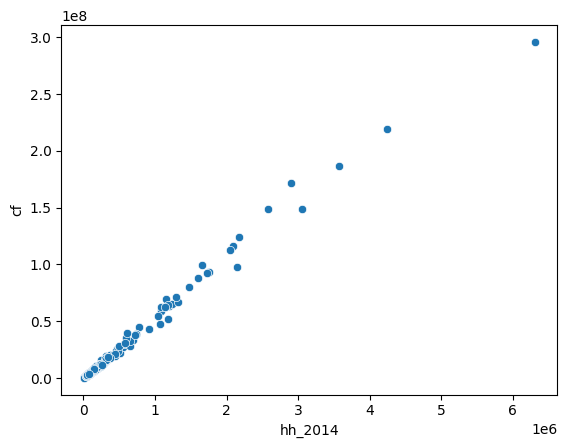

In [74]:
sns.scatterplot(data=cfc_msa, x="hh_2014", y="cf")


<Axes: xlabel='hh_2014', ylabel='cf'>

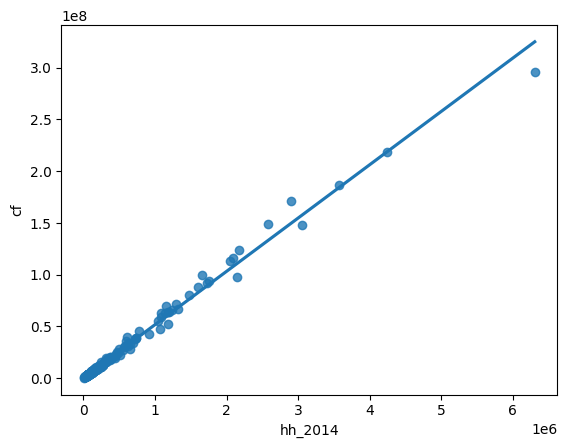

In [75]:
sns.regplot(data=cfc_msa, x = "hh_2014", y = "cf", ci = None)

C:\Users\mazee\miniconda3\envs\oxe\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


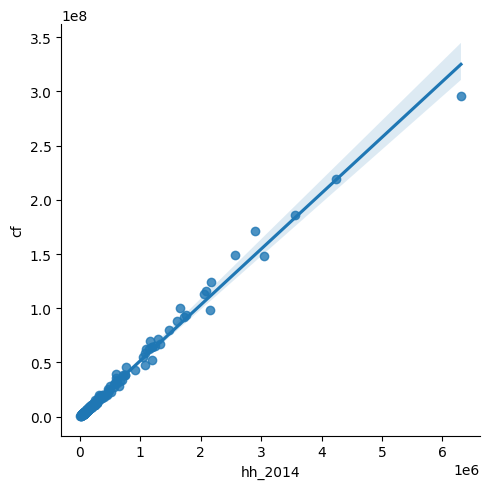

In [76]:
sns.lmplot(data=cfc_msa, x = "hh_2014", y = "cf")

In [77]:
#for i in cfc_msa.columns():
    #sns.regplot(data=cfc_msa, x = i, y = "cf", ci = None)

<Axes: xlabel='pop_2014', ylabel='cf'>

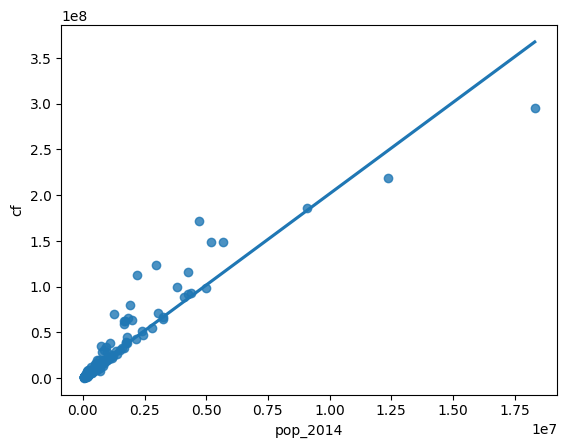

In [78]:
sns.regplot(data = cfc_msa, x = "pop_2014", y = "cf", ci = None)

<Axes: xlabel='electricity_kwh', ylabel='cf'>

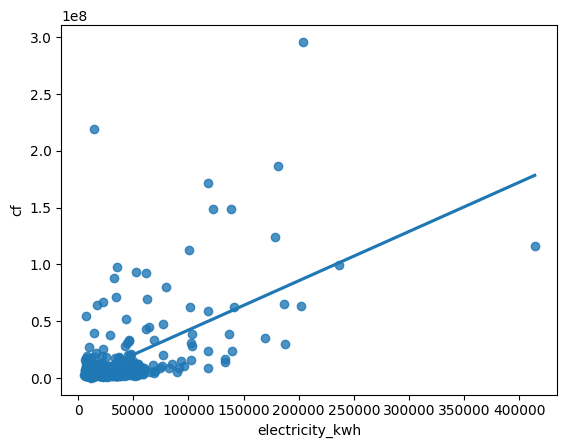

In [79]:
sns.regplot(data = cfc_msa, x = "electricity_kwh", y = "cf", ci = None)


<Axes: xlabel='vmt', ylabel='cf'>

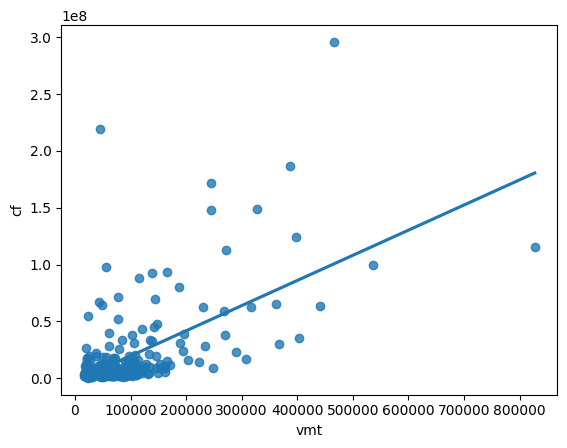

In [80]:
sns.regplot(data = cfc_msa, x = "vmt", y = "cf", ci = None)

<Axes: xlabel='vmt', ylabel='cf'>

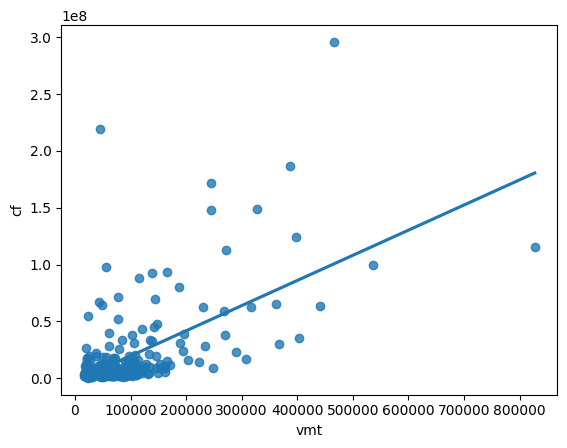

In [81]:
sns.regplot(data = cfc_msa, x = "vmt", y = "cf", ci = None)